In [1]:
# half adder
# https://learn.qiskit.org/course/introduction/the-atoms-of-computation
#
# 0 + 0 = 00 : 25%
# 0 + 1 = 01 : 25%
# 1 + 0 = 01 : 25%
# 1 + 1 = 11 : 25%
#

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.measure(qreg_q[2], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])

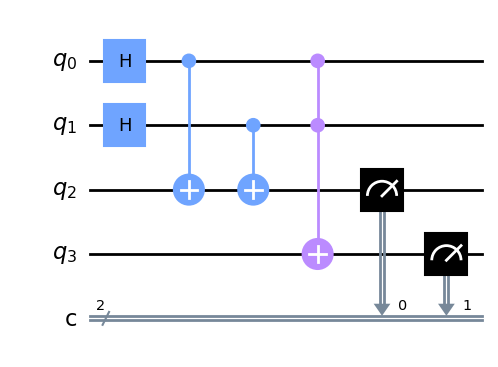

In [2]:
circuit.draw("mpl")

{'01': 513, '10': 232, '00': 255}


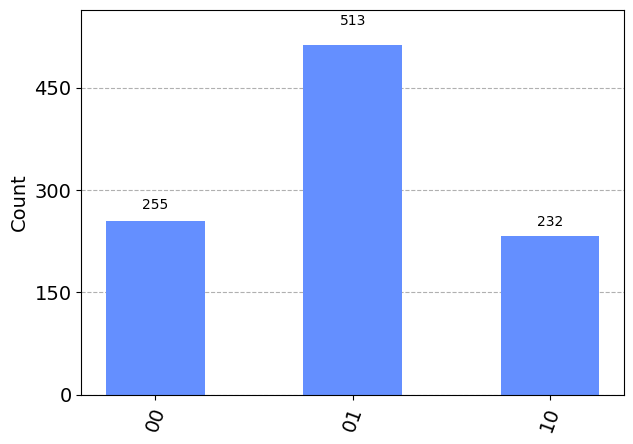

In [3]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')
job = execute(circuit, sim, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)